In [23]:
#IMPORTING LIBRARIES

import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm
from datetime import datetime
import glob
import os
import json
import pickle
import six
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

In [24]:
#IMPORTING ALL THE CSV FILES

AllCSV = [i for i in glob.glob('*.{}'.format('csv'))]
AllCSV

['RUvideos.csv',
 'INvideos.csv',
 'DEvideos.csv',
 'USvideos.csv',
 'GBvideos.csv',
 'CAvideos.csv',
 'MXvideos.csv',
 'JPvideos.csv',
 'FRvideos.csv',
 'KRvideos.csv']

In [46]:
#READING ALL CSV FILES

all_dataframes = [] # list to store each data frame separately
for csv in AllCSV:
    df = pd.read_csv(csv, encoding = 'ISO-8859-1')
    df['country'] = csv[0:2] # adding column 'country' so that each dataset could be identified uniquely
    all_dataframes.append(df)
all_dataframes[0].head(9) # index 0 to 9 for [CA, DE, FR, GB, IN, JP, KR, MX, RU, US] datasets

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,gDuslQ9avLc,17.14.11,ÐÐ°Ñ Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...,Ð¢âÐ ÐÐÐÐÐ§,22,2017-11-13T09:09:31.000Z,"Ð·Ð°Ñ Ð°Ñ Ð¸ Ð¿Ð¾Ð»Ð¸Ð½Ð°|""ÑÑÐ¸Ð¼ÑÑ ÑÐºÐ...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"ÐÐ½Ð°ÐºÐ¾Ð¼ÑÑÐµÑÑ, ÑÑÐ¾ ÐÐ°Ñ Ð°Ñ Ð¸ Ð...",RU
1,AOCJIFEA_jE,17.14.11,ÐÐ¸ÑÐ¶Ð° ÐÐµÐ¼Ð¾Ð² #29. ÐÐ¾Ð»ÑÑÐ¾Ð¸Ì Ð²...,Druzhko Show,22,2017-11-13T17:32:11.000Z,"Ð±Ð¸ÑÐ¶Ð° Ð¼ÐµÐ¼Ð¾Ð²|""Ð»ÐµÐ² ÑÐ°Ð³Ð¸Ð½ÑÐ½""|...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,Ð 29 Ð²ÑÐ¿ÑÑÐºÐµ ÐÑÑÐ¶ÐºÐ¾ Ð¨Ð¾Ñ Ð¡ÐµÑ...,RU
2,VAWNQDgwwOM,17.14.11,Ð¥ÐÐÐ ÐÐ­ÐÐ - Ð¡ÐÐÐ Ð¡Ð ÐÐÐ Ð§Ð£Ð...,Ð®Ð»Ð¸Ðº,24,2017-11-13T16:11:31.000Z,"ÑÐ¼Ð¾Ñ|""ÐºÐ¾Ð¼ÐµÐ´Ð¸Ñ""|""Ð²Ð»Ð¾Ð³""|""Ð±Ð»Ð¾Ð³...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Ð¤Ð°ÐºÑÐ»ÑÑ...,RU
3,gknkFwKQfHg,17.14.11,Ð¡Ð¾ÑÐ½Ð°Ñ ÐºÐµÑÐ°Ð´Ð¸Ð»ÑÑ Ñ ÐºÑÑÐ¸ÑÐµÐ¹,Hochland,22,2017-11-13T06:51:10.000Z,"Ñ Ð¾Ñ Ð»Ð°Ð½Ð´|""ÑÑÑ""|""ÑÐµÑÐµÐ¿ÑÑ""|""ÐºÐ°...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** ÐºÐ°Ðº Ð³Ð¾ÑÐ¾Ð²Ð¸ÑÑ ÑÐµÑÑÐ¾ÑÐ°Ð½Ð½...,RU
4,3sYvZcwzZr8,17.14.11,ÐÐÐÐÐ« Ð ÐÐÐÐ¢ÐÐÐÐ ÐÐ Ð¨ÐÐÐÐ¬Ð...,Ð¡Ð¾Ð²ÐµÑÐ³Ð¾Ð½,24,2017-11-13T16:52:36.000Z,"Ð¡Ð¾Ð²ÐµÑÐ³Ð¾Ð½|""Sovergon""|""ÐºÐ»Ð¸Ð¿Ñ""|""ÑÐ¾...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,â ÐÐÐÐÐ£Ð Ð¡ ÐÐÐÐÐ¢ÐÐÐ«: http://ka...,RU
5,SLF34Gt_UxQ,17.14.11,ÐÐÐÐÐ¡ / Versus Fresh Blood 4: ÐÐ¾Ð¹Ð½Ð° ...,versusbattleru,24,2017-11-12T17:50:31.000Z,[none],733936,47964,2545,3901,https://i.ytimg.com/vi/SLF34Gt_UxQ/default.jpg,False,False,False,Ð£ÑÐ°ÑÑÐ²Ð¾Ð²Ð°ÑÑ Ð² Ð¿ÑÐ¾ÐµÐºÑÐµ Ð´Ð¾Ð...,RU
6,YVcroDDi24s,17.14.11,ÐÐÐÐÐ ÐÐÐÐ Ð§ÐÐÐÐÐÐÐ + 1 Ð ÐÐ...,Ð¢ÐÐÐÐÐ¡,28,2017-11-12T17:19:59.000Z,"ÑÐ¾Ð¿Ð»ÐµÑ|""ÑÐ½ ÑÐ¾Ð¿Ð»ÐµÑ""|""ÑÐ½ Ð»Ð°Ð¿Ð...",1131851,78692,2427,4114,https://i.ytimg.com/vi/YVcroDDi24s/default.jpg,False,False,False,Ð¤Ð°ÐºÑÐ»ÑÑÐµÑ ÐÐ°Ð¿Ð¸ÑÐ°Ð½Ñ Ð Ð¾ÑÑÐ¸...,RU
7,TZdNwUSgRHc,17.14.11,Ð ÐÐ¦ Ð½ÐµÐ·Ð°ÐºÐ¾Ð½Ð½Ð¾ ÑÑÑÐ¾Ð¸Ñ Ñ ÑÐ°Ð...,ÐÐµÑ Ð·Ð°ÑÑÑÐ¾Ð¹ÐºÐµ Ð±ÐµÐ· ÑÐ¾Ð³Ð»Ð°ÑÐ¸Ñ,22,2017-11-13T06:29:09.000Z,[none],97006,2259,330,887,https://i.ytimg.com/vi/TZdNwUSgRHc/default.jpg,False,False,False,Ð¡ÑÑÐ¾Ð¸ÑÐµÐ»Ð¸ Ð½Ð°Ð¿Ð°Ð´Ð°ÑÑ Ð½Ð° Ð¼ÑÐ...,RU
8,YxEJVGfP74Y,17.14.11,ÐÑÐ°Ð»ÑÑÐ½ÑÑ VS ÑÑÑÑÐºÐ°Ñ Ð½Ð°ÑÐ¾Ð...,ÐÑÐ°Ð»ÑÑÐ½ÑÑ by Kuzno Productions,24,2017-11-13T17:22:55.000Z,"ÐÑÐ°Ð»ÑÑÐ½ÑÑ|""ÑÐ¼Ð¾ÑÐ¸Ð¾Ð½Ð°Ð»ÑÐ½ÑÐµ...",105116,9780,93,1184,https://i.ytimg.com/vi/YxEJVGfP74Y/default.jpg,False,False,False,ÐÐ½Ð¸Ð¼Ð°Ð½Ð¸Ðµ! Ð¡ÑÑÐ¸Ð¼ Ñ ÐÐ»ÐµÑÑÐ°Ð½...,RU


In [27]:
#FIXING DATA TYPES

for df in all_dataframes:
    # video_id 
    df['video_id'] = df['video_id'].astype('str') 
    
    # trending date
    df['trending_date'] = df['trending_date'].astype('str') 
    date_pieces = (df['trending_date']
                   .str.split('.')
                  )
    df['Year'] = date_pieces.str[0].astype(int)
    df['Day'] = date_pieces.str[1].astype(int)
    df['Month'] = date_pieces.str[2].astype(int)
    updatedyear = []
    for i in range(len(df)) : 
        y = df.loc[i, "Year"]
        newy = y+2000
        updatedyear.append(newy)
    for i in range(len(df)):
        newy = updatedyear[i]
        tr = df.loc[i, "Year"]
        df['Year'].replace(to_replace = tr, value = newy, inplace=True)
    del df['trending_date']
    df['trending_date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], format = "%Y-%m-%d")
    del df['Year']
    del df['Day']
    del df['Month']
    
    #title
    df['title'] = df['title'].astype('str')
    #channel_title
    df['channel_title'] = df['channel_title'].astype('str')
    #category_id
    df['category_id'] = df['category_id'].astype(str) 
    
    #tags
    df['tags'] = df['tags'].astype('str')
    
    # views, likes, dislikes, comment_count are already in correct data types i.e int64
    
    #thumbnail_link
    df['thumbnail_link'] = df['thumbnail_link'].astype('str') 
    
    #description
    df['description'] = df['description'].astype('str')
    
    # Changing comments_disabled, ratings_disabled, video_error_or_removed from bool to categorical
    df['comments_disabled'] = df['comments_disabled'].astype('category') 
    df['ratings_disabled'] = df['ratings_disabled'].astype('category') 
    df['video_error_or_removed'] = df['video_error_or_removed'].astype('category') 
    
    # publish_time 
    df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

In [28]:
#seperating publish_time into publish_date and publish_time
for df in all_dataframes:
    df.insert(4, 'publish_date', df['publish_time'].dt.date) # loc, column name, values for column to be inserted
    df['publish_time'] = df['publish_time'].dt.time
# Changing data type for 'publish_date' from object to 'datetime64[ns]'
for df in all_dataframes:
     df['publish_date'] = pd.to_datetime(df['publish_date'], format = "%Y-%m-%d")

In [29]:
all_dataframes[1].dtypes

video_id                          object
title                             object
channel_title                     object
category_id                       object
publish_date              datetime64[ns]
publish_time                      object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled               category
ratings_disabled                category
video_error_or_removed          category
description                       object
country                           object
trending_date             datetime64[ns]
dtype: object

In [52]:
for df in all_dataframes:
    df.set_index('video_id', inplace=True)

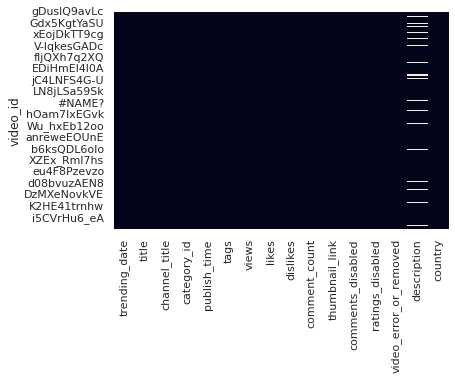

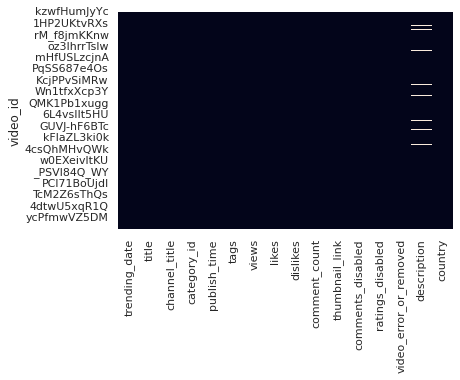

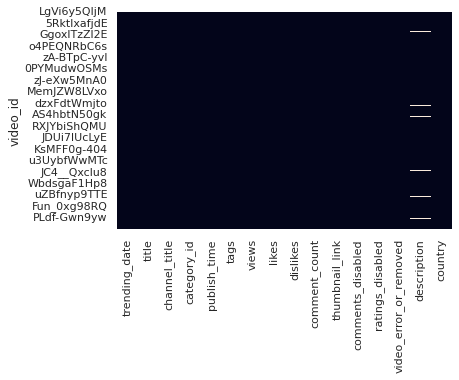

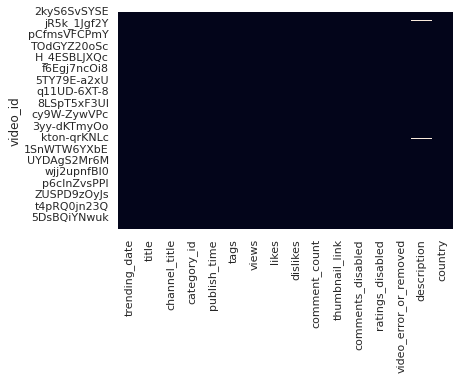

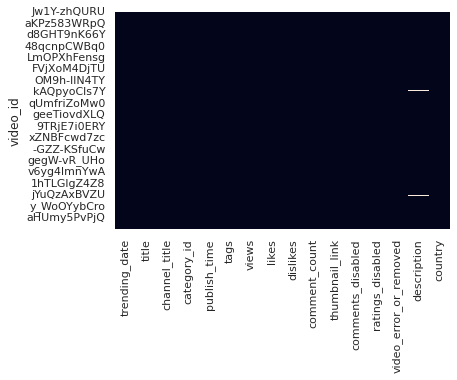

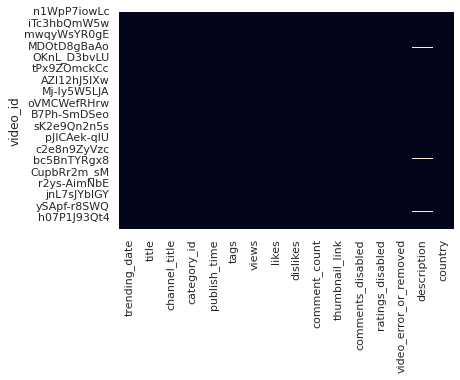

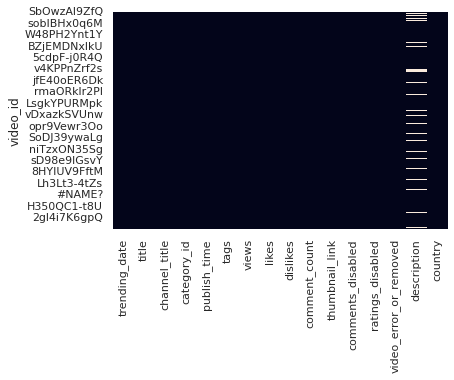

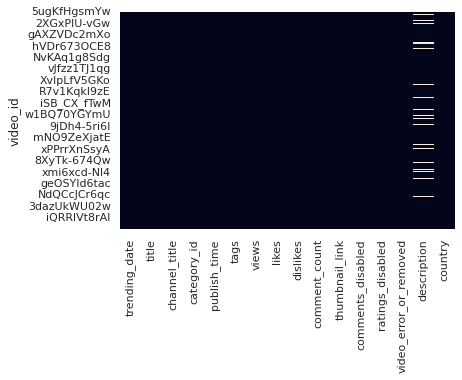

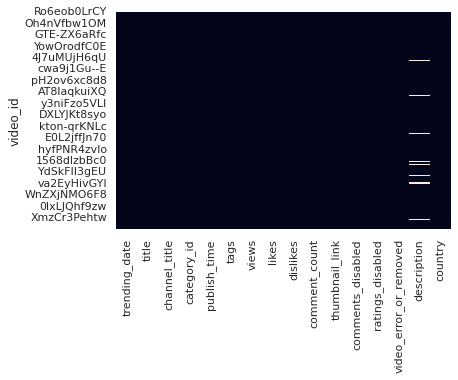

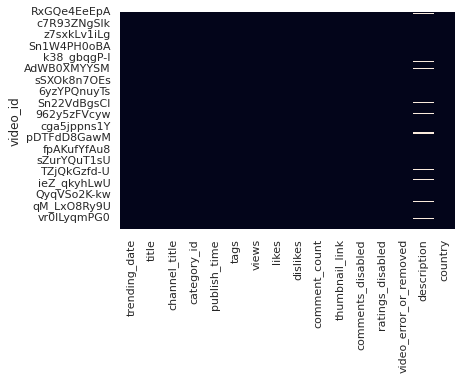

<Figure size 432x288 with 0 Axes>

In [53]:
#to see whether data is null or not
for df in all_dataframes:
    sns.heatmap(df.isnull(), cbar=False)
    plt.figure()

In [32]:
#Combining every dataframe into one huge dataframe
combined_df = pd.concat(all_dataframes)
# Making copy of original dataframe
backup_df = combined_df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')
# Sorting according to latest trending date while removing duplicates
combined_df = combined_df.reset_index().sort_values('trending_date', ascending=False).drop_duplicates('video_id',keep='first').set_index('video_id')
# Doing the same above operation for each of the individual dataframes in the list we created earlier
for df in all_dataframes:
    df = df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')
# Printing results
combined_df[['publish_date','publish_time','trending_date', 'country']].head()
# It can be seen that latest publications and trending information is at the top now

,publish_date,publish_time,trending_date,country
video_id,,,,
C-bLqIftDY4,2018-06-10,20:00:01,2018-06-14,KR
zIvfX9vc0Nw,2018-06-11,13:17:24,2018-06-14,IN
TrucLZLEl2U,2018-06-12,11:32:05,2018-06-14,IN
wERgpPK44w0,2018-06-10,04:29:54,2018-06-14,IN
qxqDNP1bDEw,2018-06-13,15:07:49,2018-06-14,IN


In [33]:
# read file
with open('US_category_id.json', 'r') as f:  # reading one randomly selected json files to make sense of its contents
    data = f.read()
# parse file
obj = json.loads(data)
# printing
obj

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [34]:
#For inserting category column we have to read json file
category_id = {}
with open('DE_category_id.json', 'r') as f:
    d = json.load(f)
    for category in d['items']:
        category_id[category['id']] = category['snippet']['title']
combined_df.insert(2, 'category', combined_df['category_id'].map(category_id))
backup_df.insert(2, 'category', backup_df['category_id'].map(category_id))
for df in all_dataframes:
    df.insert(2, 'category', df['category_id'].map(category_id))
# Printing cleaned combined dataframe
combined_df.head(3)

,title,channel_title,category,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_date
video_id,,,,,,,,,,,,,,,,,,
C-bLqIftDY4,[ë²ë¥ì¤ëì ì¦ë¬¸ì¦ì¤ ì  1398í] ì...,ë²ë¥ì¤ëì ì¦ë¬¸ì¦ì¤,NaN,29,2018-06-10,20:00:01,"ë¶êµ|""ì¦ë¬¸ì¦ì¤""|""ë²ë¥ì¤ë""|""ì í í...",63716,500,58,135,https://i.ytimg.com/vi/C-bLqIftDY4/default.jpg,False,False,False,3ìì ìëìì´ ì´í¼íìµëë¤ ê·¸ë¬...,KR,2018-06-14
zIvfX9vc0Nw,THINGS GUJARATIS ARE TIRED OF HEARING FT. Tath...,Hasley India,Comedy,23,2018-06-11,13:17:24,"hasley|""india""|""harsh""|""beniwal""|""rishhsome""|""...",447755,23896,1304,1340,https://i.ytimg.com/vi/zIvfX9vc0Nw/default.jpg,False,False,False,So we are back with a new comedy sketch on our...,IN,2018-06-14
TrucLZLEl2U,Biriyani Alaparaigal - Nakkalites,Nakkalites,Comedy,23,2018-06-12,11:32:05,"Nakkalites|""Biriyani Alaparaigal""|""Alaparaigal...",226850,13453,365,859,https://i.ytimg.com/vi/TrucLZLEl2U/default.jpg,False,False,False,Four boys in search of Biriyani on Ramzan dayT...,IN,2018-06-14


In [35]:
combined_df['category'].unique()

array([nan, 'Comedy', 'Entertainment', 'People & Blogs', 'Shows',
       'News & Politics', 'Music', 'Education', 'Film & Animation',
       'Gaming', 'Howto & Style', 'Sports', 'Science & Technology',
       'Pets & Animals', 'Autos & Vehicles', 'Travel & Events', 'Movies',
       'Trailers'], dtype=object)

<AxesSubplot:xlabel='ratio', ylabel='category'>

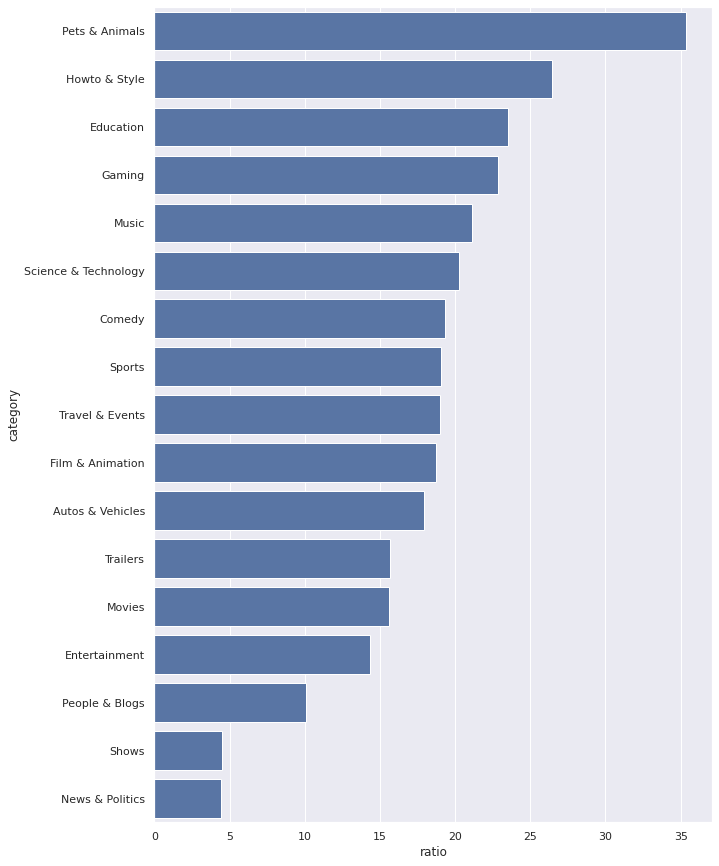

In [36]:
#ratio of likes and dislike in different categories


# calculating total likes for each category
likesdf = combined_df.groupby('category')['likes'].agg('sum')
# calculating total dislikes for each category
dislikesdf = combined_df.groupby('category')['dislikes'].agg('sum')
# calculating ratios of likes to dislikes
ratiodf = likesdf/dislikesdf 
# most liked category to appear on top
ratiodf = ratiodf.sort_values(ascending=False).reset_index()
# plotting bar chart
ratiodf.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=ratiodf,
            label="Likes-Dislikes Ratio", color="b")

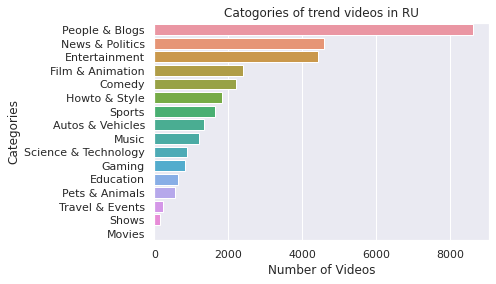

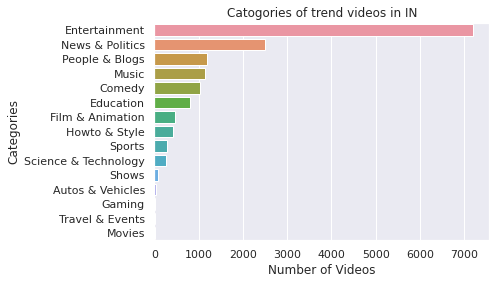

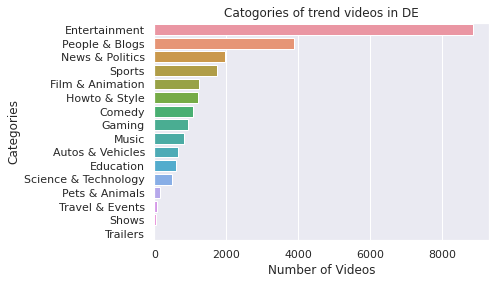

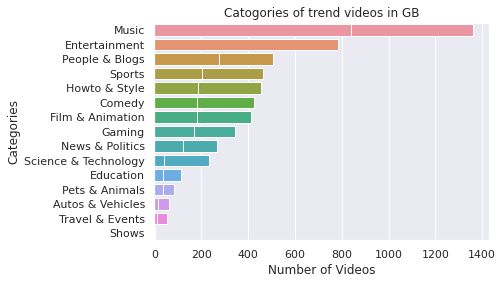

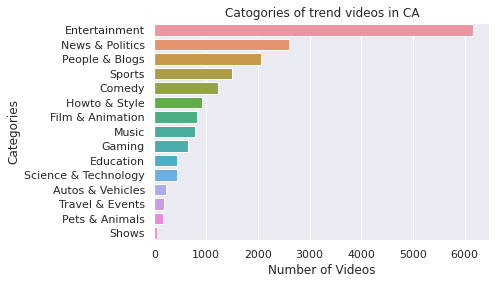

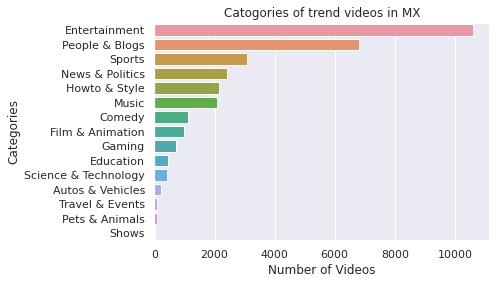

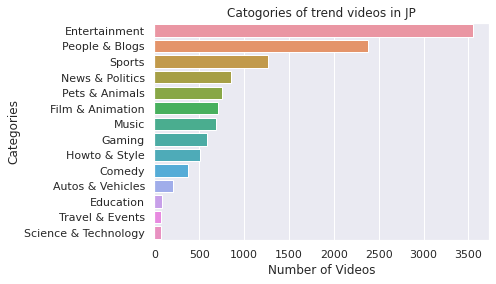

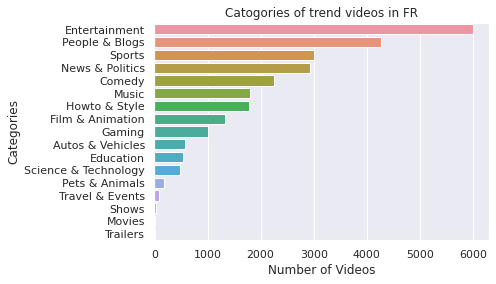

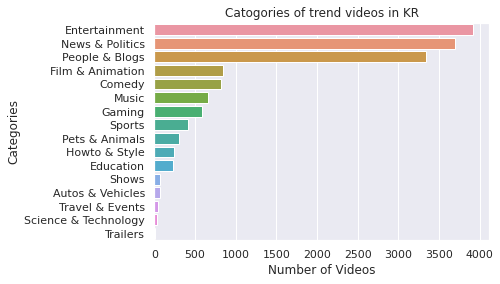

<Figure size 432x288 with 0 Axes>

In [49]:
#users like videos from which category most


# Getting names of all countries
countries = []
allcsv = [i for i in glob.glob('*.{}'.format('csv'))]
for csv in allcsv:
    c = csv[0:2]
    countries.append(c)
for country in countries:
    if country == 'US':
        tempdf = combined_df[combined_df['country']==country]['category'].value_counts().reset_index()
        ax = sns.barplot(y=tempdf['index'], x=tempdf['category'], data=tempdf, orient='h')
        plt.xlabel("Number of Videos")
        plt.ylabel("Categories")
        plt.title("Catogories of trend videos in " + country)
    else:
        tempdf = combined_df[combined_df['country']==country]['category'].value_counts().reset_index()
        ax = sns.barplot(y=tempdf['index'], x=tempdf['category'], data=tempdf, orient='h')
        plt.xlabel("Number of Videos")
        plt.ylabel("Categories")
        plt.title("Catogories of trend videos in " + country)
        plt.figure()

In [38]:
#top five videos trending in each country
temporary = []
for df in all_dataframes:
    temp = df
    temp = temp.reset_index().sort_values(by = ['views'], ascending=False)
    temp.drop_duplicates(subset ="video_id", keep = 'first', inplace = True)
    temp.set_index('video_id', inplace=True)
    temp = temp.head(5) # top 5 that are on trending
    temporary.append(temp)
# Printing 3 randomly selected countries
temporary[2][['title', 'channel_title', 'category', 'views', 'likes']]

,title,channel_title,category,views,likes
video_id,,,,,
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,113876217,2811217
6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,80360459,2513103
7C2z4GqqS5E,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,Music,73463137,4924056
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,73432600,2478908
_I_D_8Z4sJE,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,50896717,550476


In [39]:
#Is the most liked video also the most trending video?
temporary = [] # to store results for each country
for df in all_dataframes:
    temp = df
    temp = temp.reset_index().sort_values(by = ['likes'], ascending=False)
    temp.drop_duplicates(subset ="video_id", keep = 'first', inplace = True)
    temp.set_index('video_id', inplace=True)
    temp = temp.head(5) # top 5 that are most liked
    temporary.append(temp)
# Printing 3 randomly selected results
temporary[0][['views', 'likes']]

,views,likes
video_id,,
7C2z4GqqS5E,62796390,4470923
kTlv5_Bs8aw,20565795,2320662
p8npDG2ulKQ,10666323,1956259
FlsCjmMhFmw,52611730,1891836
kX0vO4vlJuU,7518990,1573046


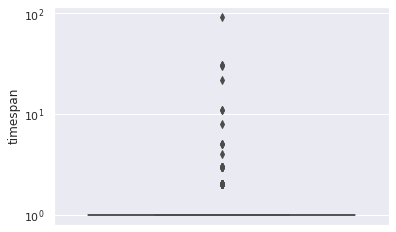

/home/nikhil/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


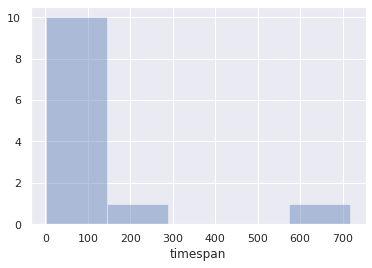

In [40]:
# Calculating days between publish and trending date
temporary = []
for data in all_dataframes:
    temp = data
    temp['timespan'] = (temp['trending_date'] - temp['publish_date']).dt.days
    temporary.append(temp)
# Plotting
to_trending = temporary[0].sample(1000).groupby('video_id').timespan.max() # CA
sns_ax = sns.boxplot(y = to_trending)
_ = sns_ax.set(yscale = "log")
plt.show()
_ = sns.distplot(to_trending.value_counts(),bins='rice',kde=False)

In [41]:
temp = combined_df
temp = temp.groupby('category')['views', 'likes'].apply(lambda x: x.astype(int).sum())
temp = temp.sort_values(by='likes', ascending=False).head()
temp

/tmp/ipykernel_42246/1729928692.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = temp.groupby('category')['views', 'likes'].apply(lambda x: x.astype(int).sum())


,views,likes
category,,
Entertainment,17587883727,471898589
Music,18175192977,444810320
Comedy,4573398913,218752104
People & Blogs,5606736251,157767430
Howto & Style,2215630428,77250718


In [43]:
col = ['views', 'likes', 'dislikes', 'comment_count']
corr = combined_df[col].corr()
corr

,views,likes,dislikes,comment_count
views,1.000000,0.768352,0.378172,0.423572
likes,0.768352,1.000000,0.435397,0.700513
dislikes,0.378172,0.435397,1.000000,0.667473
comment_count,0.423572,0.700513,0.667473,1.000000
